<a href="https://colab.research.google.com/github/uncomforming/himatubushi/blob/main/%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install scikit-learn pillow ipython scipy mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
import graphviz
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
Ir=LinearRegression().fit(X_train,y_train)
ridge=Ridge().fit(X_train,y_train)
ridge10=Ridge(alpha=10).fit(X_train,y_train)#汎化より
ridge01=Ridge(alpha=.1).fit(X_train,y_train)#訓練より
lasso=Lasso().fit(X_train,y_train)
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
def plot_feature_importances_canser(model):
  n_features=cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align="center")
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

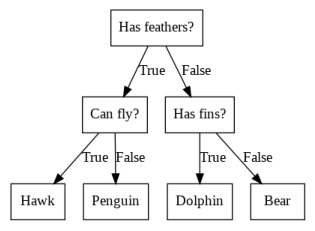

In [2]:
mglearn.plots.plot_animal_tree()

決定木での学習は正解に最も早くたどり着けるYes/No質問（機械学習ではテストと呼ばれる）の学習を意味する。
分類等が終わった葉の事を純粋と呼ぶ。
全ての葉が純粋になるまで学習を行うとモデルが複雑になりすぎ、過学習を起こす恐れがある。
過学習の対策として構築過程で木の成長を止める「事前枝刈り」と構築した木の中で情報量の少ないノードを削除する「事後枝刈り」の二つがある。
また、事前枝刈りには深さの制限や葉の最大数を制限する方法などがある

実際に構築してみる

In [3]:

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(f"訓練セットの精度{tree.score(X_train,y_train)}")
print(f"テストセットの精度{tree.score(X_test,y_test)}")

訓練セットの精度1.0
テストセットの精度0.9370629370629371


訓練データが100％：葉が純粋だから
決定木の深さに制約を与えないといくらでも深く、複雑になる。
max_depthを用いて深さに制限を与えた場合は以下のようになる。

In [4]:
treemax4=DecisionTreeClassifier(max_depth=4,random_state=0)
treemax4.fit(X_train,y_train)
print(f"訓練セットの精度{treemax4.score(X_train,y_train)}")
print(f"テストセットの精度{treemax4.score(X_test,y_test)}")

訓練セットの精度0.9882629107981221
テストセットの精度0.951048951048951


深さを制限したことにより訓練セットに対する精度は下がったが反対にテストセットに対する精度は上がった

また、決定木を可視化することもexport_graphvizを用いることで可能になる

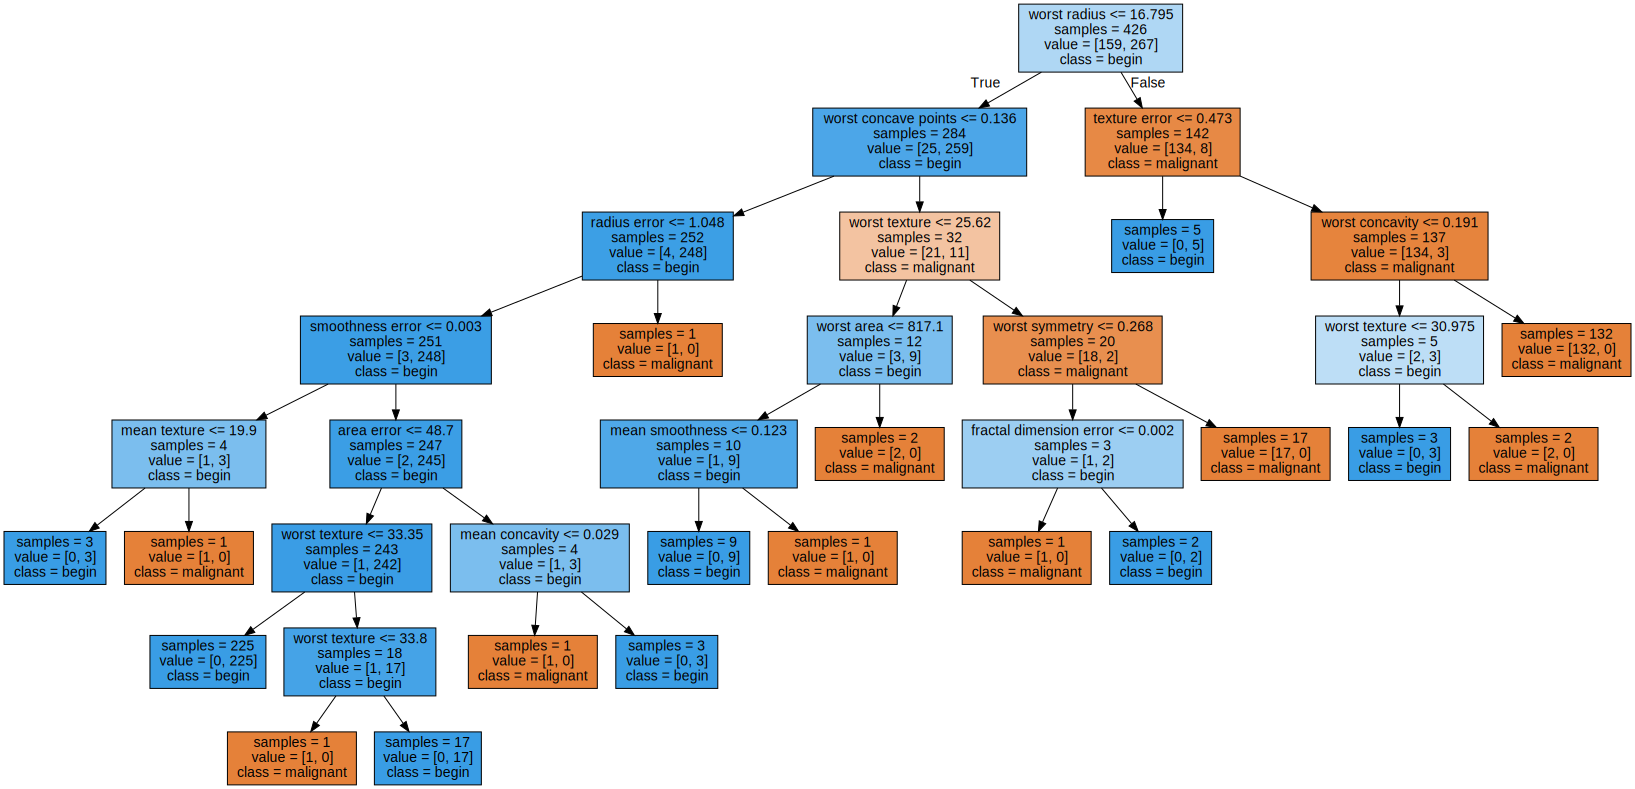

In [5]:
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","begin"],feature_names=cancer.feature_names,impurity=False,filled=True)
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

可視化することが可能なのでどのような理由で分類などがされたのかが分かりやすい。
しかし、すべてを見るのは大変なのでこの挙動を要約する特性値を見ることが多い。
この特性値としてよく使われるものが特徴量の重要度である。


In [6]:
print(f"特徴量の重要度:\n{tree.feature_importances_}")

特徴量の重要度:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [11]:
def plot_feature_importances_canser(model):
  n_features=cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align="center")
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

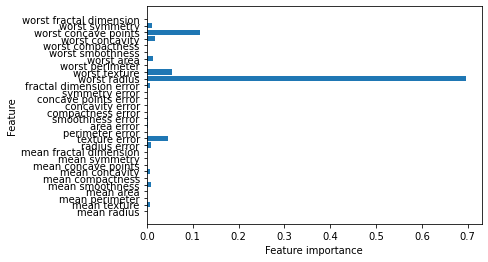

In [12]:
plot_feature_importances_canser(tree)

Feature importances: [0. 1.]


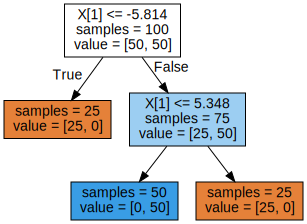

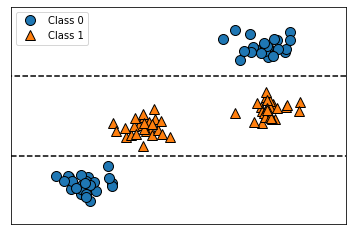

In [14]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

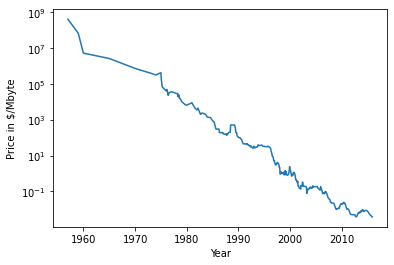

In [15]:
import os
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [16]:
from sklearn.tree import DecisionTreeRegressor
#決定木を使い過去のデータから将来の価格を予測する
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]